## **Sketch TSNE**

In [0]:
import os
import numpy as np
dictionary={}
training_files='/content/gdrive/My Drive/Feature_Vectors/Sketchs/Training'
labels=os.listdir(training_files)
#dicts=list(enumerate(labels))
#Convert(dicts,dictionary)
x_train_skt=[]
y_train=[]
for label in labels:
  skt_fea_names=os.listdir(os.path.join(training_files,label))
  #label_list
  for skt in skt_fea_names:
    skt_fea_path=os.path.join(training_files,label,skt)
    skt_fea=np.load(skt_fea_path)
    x_train_skt.append(skt_fea)
    #y_train.append(label+'-'+img)
x_train_skt=np.asarray(x_train_skt)

In [0]:
from sklearn.preprocessing import LabelEncoder
x=LabelEncoder()
f=x.fit_transform(labels)

In [0]:
y=[]
for i in f:
  for j in range(0,64):
    y.append(i)

In [0]:
y=np.asarray(y)

In [44]:
y.shape

(5888,)

In [45]:
len(np.unique(y))

92

In [0]:
palette = np.array(sns.color_palette("hls", 92))

In [47]:
palette.shape

(92, 3)

In [48]:
#palette.shape
palette[y.astype(np.int)].shape

(5888, 3)

In [0]:
from sklearn.manifold import TSNE

In [0]:
tsne=TSNE(n_components=2,random_state=0)

In [0]:
final=tsne.fit_transform(x_train_skt)

In [0]:
def fashion_scatter(x, colors):
    # choose a color palette with seaborn.
    num_classes = len(np.unique(colors))
    palette = np.array(sns.color_palette("hls", num_classes))

    # create a scatter plot.
    f = plt.figure(figsize=(16, 16))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    # add the labels for each digit corresponding to the label
    #txts = []

    #for i in range(num_classes):

        # Position of each label at median of data points.

        #xtext, ytext = np.median(x[colors == i, :], axis=0)
        #txt = ax.text(xtext, ytext, str(i), fontsize=24)
        #txt.set_path_effects([PathEffects.Stroke(linewidth=5, foreground="w"),PathEffects.Normal()])
        #txts.append(txt)

    return f, ax, sc

In [60]:
final

array([[-39.146908 ,  -5.403588 ],
       [-24.743498 ,  -4.6712446],
       [-26.74547  ,  -5.517774 ],
       ...,
       [ 58.697712 , -18.60539  ],
       [ 51.480553 ,  10.245966 ],
       [ 58.377914 , -19.174114 ]], dtype=float32)

## **Without Labels**

(<Figure size 1152x1152 with 1 Axes>,
 <matplotlib.collections.PathCollection at 0x7fab4af88860>)

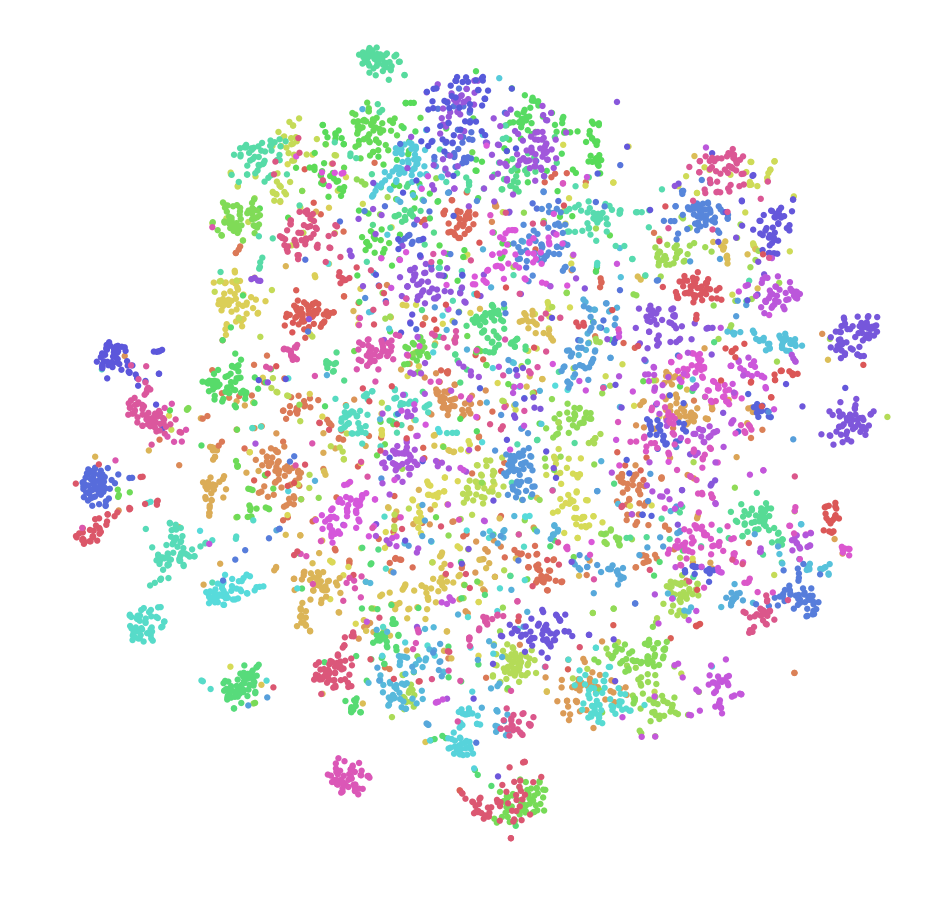

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patheffects as PathEffects
fashion_scatter(final,y) #Visualizing the PCA output
#plt.plot(final)

In [0]:
def fashion_scatter_(x, colors):
    # choose a color palette with seaborn.
    num_classes = len(np.unique(colors))
    palette = np.array(sns.color_palette("hls", num_classes))

    # create a scatter plot.
    f = plt.figure(figsize=(16, 16))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    # add the labels for each digit corresponding to the label
    txts = []

    for i in range(num_classes):

        # Position of each label at median of data points.

        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([PathEffects.Stroke(linewidth=5, foreground="w"),PathEffects.Normal()])
        txts.append(txt)

    return f, ax, sc, txts

## With Labels

(<Figure size 1152x1152 with 1 Axes>,
 [Text(-28.78085, 21.117931, '0'),
  Text(-3.2597246, 37.685482, '1'),
  Text(7.0922203, -26.14519, '2'),
  Text(-29.9637, 2.5631342, '3'),
  Text(26.147423, -14.765501, '4'),
  Text(-33.967186, -9.037733, '5'),
  Text(-5.7346573, 4.5849733, '6'),
  Text(15.82568, -49.947052, '7'),
  Text(33.86799, 2.5433784, '8'),
  Text(-44.62482, -12.352265, '9'),
  Text(-27.494648, -31.266985, '10'),
  Text(8.6285095, 17.63784, '11'),
  Text(-9.275408, -31.68992, '12'),
  Text(-41.14524, 23.66588, '13'),
  Text(-10.746291, -14.333197, '14'),
  Text(15.599151, -14.065842, '15'),
  Text(22.046505, 33.77394, '16'),
  Text(-33.311874, 46.062305, '17'),
  Text(-1.9866632, -11.18434, '18'),
  Text(5.2054977, -46.00981, '19'),
  Text(31.689955, -33.07328, '20'),
  Text(32.13928, 31.805439, '21'),
  Text(27.724144, -52.513393, '22'),
  Text(14.473091, 0.9798901, '23'),
  Text(25.72895, -44.893284, '24'),
  Text(-41.02189, 39.048553, '25'),
  Text(6.5651426, -72.77221, 

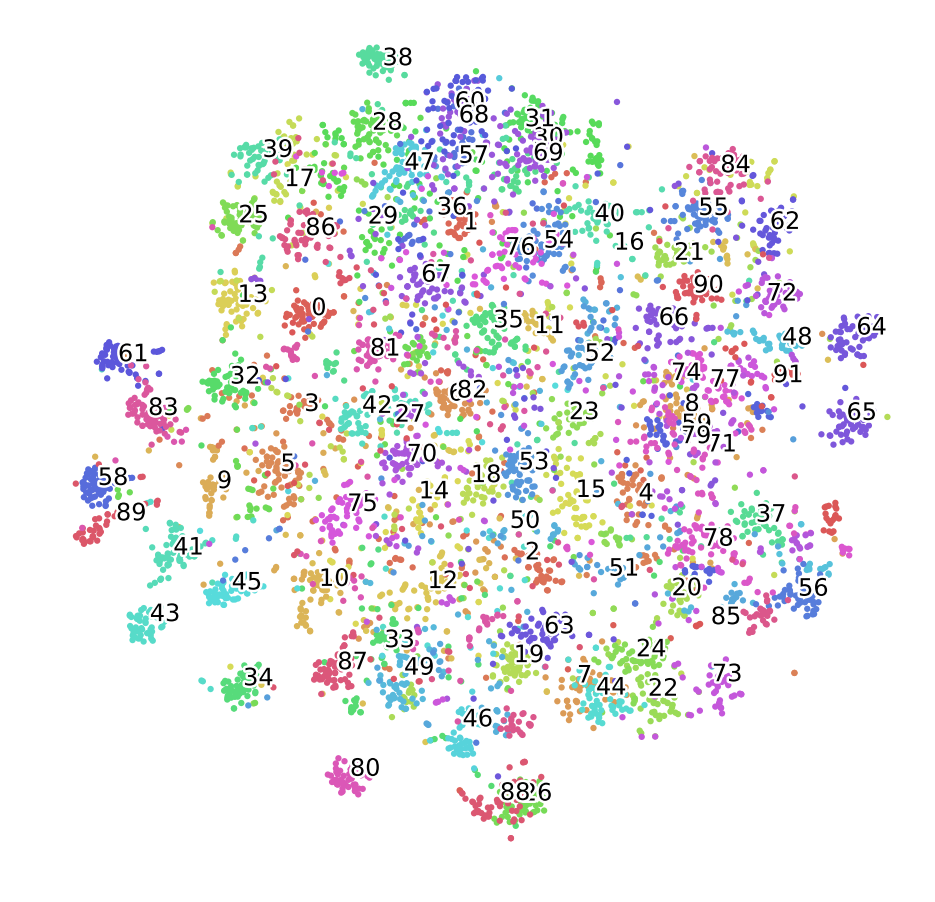

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patheffects as PathEffects
fashion_scatter_(final,y) #Visualizing the PCA output
#plt.plot(final)

## **Image TSNE**

In [0]:
img_training_files='/content/gdrive/My Drive/Feature_Vectors/Image/Training'
labelss=os.listdir(img_training_files)
x_train_img=[]
y_train_img=[]
for label in labels:
  img_names=os.listdir(os.path.join(img_training_files,label))
  for img in img_names:
    img_fea_path=os.path.join(img_training_files,label,img)
    img_fea=np.load(img_fea_path)
    x_train_img.append(img_fea)
x_train_img=np.asarray(x_train_img)

In [0]:
x_=LabelEncoder()
f_=x_.fit_transform(labelss)

In [0]:
y_=[]
for i in f_:
  for j in range(0,64):
    y_.append(i)
y_=np.asarray(y)

In [0]:
_tsne_=TSNE(n_components=2,random_state=0)

In [0]:
final_img=_tsne_.fit_transform(x_train_img)

(<Figure size 1152x1152 with 1 Axes>,
 [Text(-16.313864, -43.390327, '0'),
  Text(13.226017, -12.093977, '1'),
  Text(-18.906347, -14.43922, '2'),
  Text(16.759201, -24.647419, '3'),
  Text(25.366331, -45.914433, '4'),
  Text(5.4035854, -17.242859, '5'),
  Text(37.83187, 18.138021, '6'),
  Text(-42.281025, 40.429592, '7'),
  Text(7.1708937, -2.0308511, '8'),
  Text(33.808758, -12.5578375, '9'),
  Text(41.62418, -25.22481, '10'),
  Text(-14.296551, -35.624825, '11'),
  Text(14.290678, -72.0058, '12'),
  Text(37.943306, 63.005684, '13'),
  Text(56.309433, 4.965908, '14'),
  Text(-38.524445, 56.29859, '15'),
  Text(-53.268425, 17.133453, '16'),
  Text(6.9392567, 26.34269, '17'),
  Text(41.754974, -0.7297357, '18'),
  Text(-35.959213, -50.8453, '19'),
  Text(29.047817, 2.722626, '20'),
  Text(-45.427856, 5.4827805, '21'),
  Text(-27.101488, 44.98595, '22'),
  Text(8.118137, 11.73787, '23'),
  Text(-33.69436, 38.156082, '24'),
  Text(-15.804235, 29.86537, '25'),
  Text(-21.118431, -31.96216

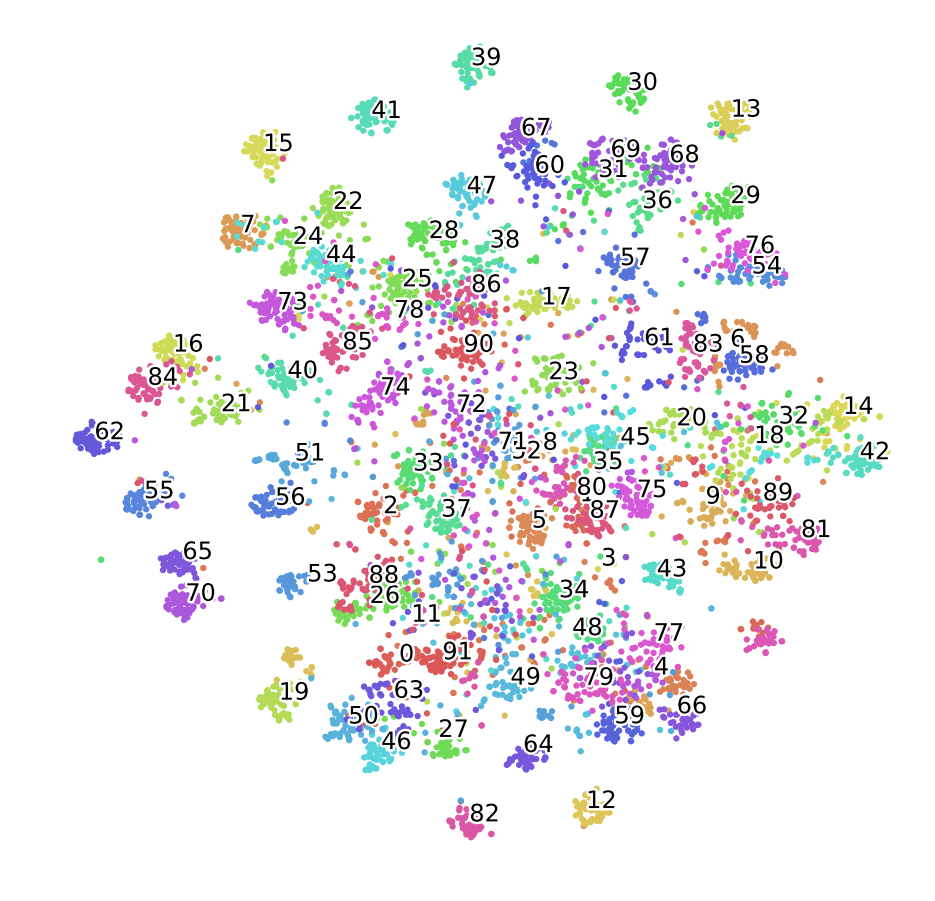

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patheffects as PathEffects
fashion_scatter_(final_img,y_) #Visualizing the PCA output
#plt.plot(final)

(<Figure size 1152x1152 with 1 Axes>,
 <matplotlib.collections.PathCollection at 0x7fab4b2c2588>)

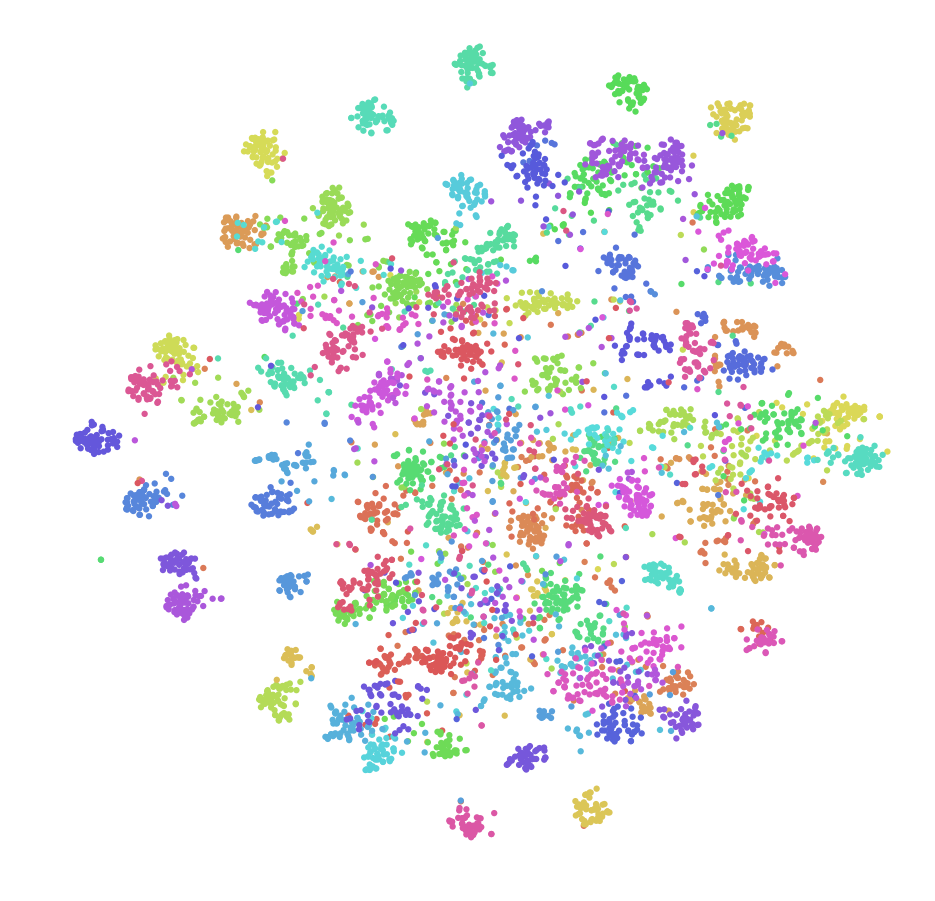

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patheffects as PathEffects
fashion_scatter(final_img,y_) #Visualizing the PCA output
#plt.plot(final)